In [1]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [3]:
def calculate_confidence_interval(data, window, min_periods, z_score_threshold):
    # Calculate the rolling mean and standard deviation
    mean = data.rolling(window=window, min_periods=min_periods).mean()
    std = data.rolling(window=window, min_periods=min_periods).std()

    # Calculate the upper and lower bounds of the confidence interval
    lower_bound = mean - z_score_threshold * std
    upper_bound = mean + z_score_threshold * std

    return pd.DataFrame({'LowerBound': lower_bound, 'UpperBound': upper_bound})


In [4]:
def plot_with_confidence_interval(data, confidence_interval, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data, label='Data')
    plt.fill_between(data.index, confidence_interval['LowerBound'], confidence_interval['UpperBound'], color='red', alpha=0.1)
    plt.title(title)
    plt.legend()
    plt.show()

In [6]:
# Load the data from the Excel files
data_3m = pd.read_excel('platform_3m_actuals_new.xlsx')
data_6m = pd.read_excel('platform_6m_actuals_new.xlsx')

# Combine the two dataframes into one
data_combined = pd.concat([data_3m[['datestamp', 'qtr', 'Bookings_3m', 'Platform']].assign(Period='3m'), 
                           data_6m[['datestamp', 'qtr', 'Bookings_6m', "Platform"]].assign(Period='6m')])
#
print(data_combined)

# Filter the data to only include the "8k chassis" platform
data_3m = data_3m[data_3m['Platform'] == '8k_Chassis']
data_6m = data_6m[data_6m['Platform'] == '8k_Chassis']


# Convert 'datestamp' to datetime and sort by it
data_3m['datestamp'] = pd.to_datetime(data_3m['datestamp'])
data_6m['datestamp'] = pd.to_datetime(data_6m['datestamp'])

      datestamp     qtr  Bookings_3m         Platform Period  Bookings_6m
0    2019-10-31  Q1FY20          4.0       8k_Chassis     3m          NaN
1    2020-01-31  Q2FY20         36.0       8k_Chassis     3m          NaN
2    2020-04-30  Q3FY20         29.0       8k_Chassis     3m          NaN
3    2020-07-31  Q4FY20        124.0       8k_Chassis     3m          NaN
4    2020-10-31  Q1FY21        724.0       8k_Chassis     3m          NaN
...         ...     ...          ...              ...    ...          ...
4160 2021-04-30  Q3FY21          NaN  WNBU_Outdoor AP     6m      49084.0
4161 2021-07-31  Q4FY21          NaN  WNBU_Outdoor AP     6m      66930.0
4162 2021-10-31  Q1FY22          NaN  WNBU_Outdoor AP     6m      71359.0
4163 2022-01-31  Q2FY22          NaN  WNBU_Outdoor AP     6m      68786.0
4164 2022-04-30  Q3FY22          NaN  WNBU_Outdoor AP     6m      74810.0

[8330 rows x 6 columns]


In [7]:
# Set 'datestamp' as the index and format it to show month and year
data_3m.set_index('datestamp', inplace=True)
data_6m.set_index('datestamp', inplace=True)

data_3m.index = data_3m.index.strftime('%b %Y')
data_6m.index = data_6m.index.strftime('%b %Y')


In [10]:
confidence_interval_3m = calculate_confidence_interval(data_3m['Bookings_3m'], window=3, min_periods=1, z_score_threshold=3)
confidence_interval_6m = calculate_confidence_interval(data_6m['Bookings_6m'], window=3, min_periods=1, z_score_threshold=3)

In [11]:
print(data_combined)

      datestamp     qtr  Bookings_3m         Platform Period  Bookings_6m
0    2019-10-31  Q1FY20          4.0       8k_Chassis     3m          NaN
1    2020-01-31  Q2FY20         36.0       8k_Chassis     3m          NaN
2    2020-04-30  Q3FY20         29.0       8k_Chassis     3m          NaN
3    2020-07-31  Q4FY20        124.0       8k_Chassis     3m          NaN
4    2020-10-31  Q1FY21        724.0       8k_Chassis     3m          NaN
...         ...     ...          ...              ...    ...          ...
4160 2021-04-30  Q3FY21          NaN  WNBU_Outdoor AP     6m      49084.0
4161 2021-07-31  Q4FY21          NaN  WNBU_Outdoor AP     6m      66930.0
4162 2021-10-31  Q1FY22          NaN  WNBU_Outdoor AP     6m      71359.0
4163 2022-01-31  Q2FY22          NaN  WNBU_Outdoor AP     6m      68786.0
4164 2022-04-30  Q3FY22          NaN  WNBU_Outdoor AP     6m      74810.0

[8330 rows x 6 columns]


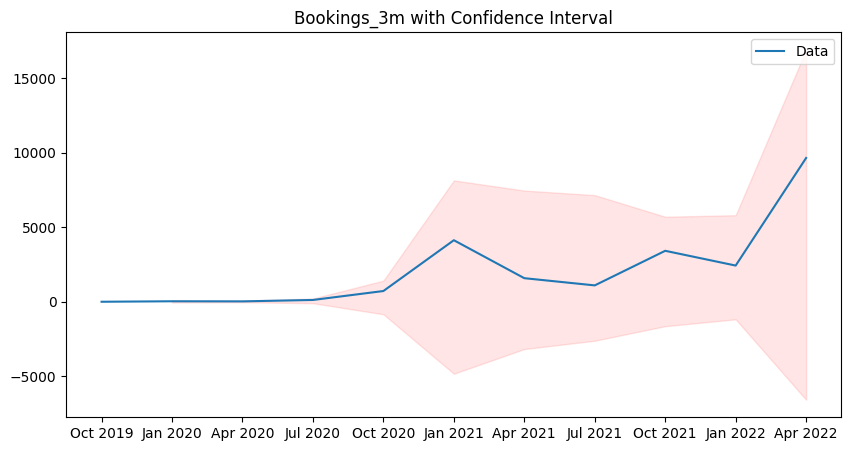

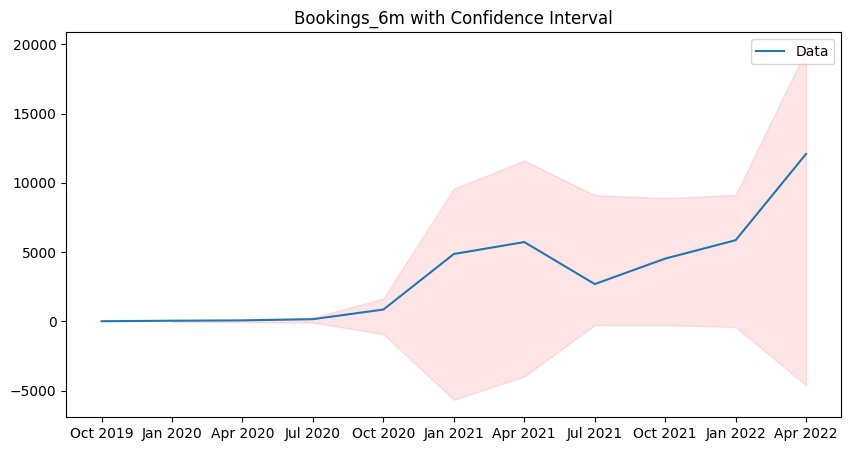

In [13]:
# Plot the 'Bookings_3m' and 'Bookings_6m' columns with confidence intervals
plot_with_confidence_interval(data_3m['Bookings_3m'], confidence_interval_3m, title='Bookings_3m with Confidence Interval')
plot_with_confidence_interval(data_6m['Bookings_6m'], confidence_interval_6m, title='Bookings_6m with Confidence Interval')
